In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/gdrive/MyDrive/Cursos/DataScienceI_Challenge/datasets/2. spotify_tracks/dataset.csv')

# Visualizaciones en Python

**Alumno**: Javier López Malone

**Profesora**: Estefania Karina Susanj

**Tutor**: Rubén Baquel

**Dataset seleccionado**: Spotify tracks

## Limpieza de datos

* Evalúo si hay nulos

In [3]:
df = df.drop('Unnamed: 0', axis='columns')
df = df.dropna(subset=['artists'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [4]:
print(df.isnull().sum())

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


* Evalúo si hay duplicados y los elimino

In [5]:
duplicates = df[df.duplicated(keep=False)].value_counts(subset=['track_id', 'artists', 'album_name', 'track_name']).reset_index()
print("Filas duplicadas:")
duplicates


Filas duplicadas:


,track_id,artists,album_name,track_name,0
0,6P2z6tZi1K8pyHXV1i0DnK,Nikolay Kopylov,У камина (Старинные Русские Романсы)/ At a Fir...,Твои глаза зеленые ( Green Eyes),3
1,0jI5ex80hYYbLQsX3G5Ze7,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,The Well,3
2,2abeQBWSIzjO8J1KrPFZHy,Oleg Pogudin,Русский романс. Часть I,Забыли вы…,3
3,52VSOpFbg4GBpPNNv4ulbP,"Группа ""Загадка""",20 золотых дворовых песен. Разлука,В больнице больная лежала,3
4,5sP7Jb0FBF2fatb1CZ3zpa,Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...,Hans Zimmer: Epic Scores,"The Gladiator Waltz - From ""Gladiator"" Soundtrack",3
...,...,...,...,...,...
439,2ldVpRwLjfUWCDqrjNQYWt,Daddy Yankee;Bad Bunny,Perreo en Halloween,X ÚLTIMA VEZ,2
440,2lTWvfqX8itVpHvQ8EMhS6,Wolfgang Amadeus Mozart;Academy of St. Martin ...,Mozart - All Day Classics,"The London Sketchbook, K. 15a-ss (arr. and/or ...",2
441,2k07yELPvHZEqwdRzROUpc,Hans Zimmer;Adam Lukas;James Everingham;AURORA,Frozen Planet II (Original Television Soundtrack),Losing Ice,2
442,2jqBkZ3VhBeuTLwXZtfSGe,Georgi Vinogradov;The Red Army Choir,Когда поют солдаты...,Соловьи,2


In [6]:
# Elimino los duplicados
df = df.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float

* Evalúo los formatos de las columnas de interes:

    * Popularidad de la pista (popularity)

    * Duración de la pista (duration_ms)

    * Bailabilidad (danceability), energía (energy), valencia (valence)

In [7]:
print(f"Popularidad de la pista\n\nMax: {df['popularity'].max()} | Min: {df['popularity'].min()} | Media: {df['popularity'].mean()}")

Popularidad de la pista

Max: 100 | Min: 0 | Media: 33.19880766659238


In [ ]:
print(f"Duración de la pista\n\nMax: {df['duration_ms'].max()} | Min: {df['duration_ms'].min()} | Media: {df['duration_ms'].mean()}")

Duración de la pista

Max: 5237295 | Min: 8586 | Media: 229144.36557833743


In [8]:
print(f"Bailabilidad\n\nMax: {df['danceability'].max()} | Min: {df['danceability'].min()} | Media: {df['danceability'].mean()}")

print(f"\n\nEnergía\n\nMax: {df['energy'].max()} | Min: {df['energy'].min()} | Media: {df['energy'].mean()}")

print(f"\n\nValencia\n\nMax: {df['valence'].max()} | Min: {df['valence'].min()} | Media: {df['valence'].mean()}")

Bailabilidad

Max: 0.985 | Min: 0.0 | Media: 0.5621663550256297


Energía

Max: 1.0 | Min: 0.0 | Media: 0.6344584717695565


Valencia

Max: 0.995 | Min: 0.0 | Media: 0.4694744376086472


* Evalúo la distribución de los campos de interés:

    * Popularidad de la pista (popularity)

    * Duración de la pista (duration_ms)

    * Bailabilidad (danceability), energía (energy), valencia (valence)


In [9]:
df[['popularity','duration_ms','danceability','energy','valence']].describe()

,popularity,duration_ms,danceability,energy,valence
count,89740.000000,8.974000e+04,89740.000000,89740.000000,89740.000000
mean,33.198808,2.291444e+05,0.562166,0.634458,0.469474
std,20.580640,1.129458e+05,0.176692,0.256606,0.262864
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000
25%,19.000000,1.730400e+05,0.450000,0.457000,0.249000
50%,33.000000,2.132955e+05,0.576000,0.676000,0.457000
75%,49.000000,2.642930e+05,0.692000,0.853000,0.682000
max,100.000000,5.237295e+06,0.985000,1.000000,0.995000


In [10]:
# Calculo el rango intercuartílico (IQR) para cada característica
Q1 = df[['popularity','duration_ms','danceability','energy','valence']].quantile(0.25)
Q3 = df[['popularity','duration_ms','danceability','energy','valence']].quantile(0.75)
IQR = Q3 - Q1

# Calculo los límites superior e inferior del rango aceptable
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico valores atípicos
outliers = (df[['popularity','duration_ms','danceability','energy','valence']] < lower_bound) | (df[['popularity','duration_ms','danceability','energy','valence']] > upper_bound)

# Muestro el número de valores atípicos de cada característica
print(outliers.sum())

popularity        11
duration_ms     4225
danceability     474
energy             0
valence            0
dtype: int64


In [11]:
print("Outliers en Popularidad:\n")
df[outliers['popularity']]

Outliers en Popularidad:



,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,dance
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin
67500,3k3NWokhRRkEPhCzPmV8TW,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,3,-5.745,0,0.0413,0.08000,0.000001,0.5280,0.268,79.928,4,latin
67559,5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,7,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,4,latin
79000,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,piano


Observaciones:

No se ven datos "atípicos" en outliers de popularidad.

In [12]:
print("Outliers en Duración de pista:\n")
df[outliers['duration_ms']]

Outliers en Duración de pista:



,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
253,0I0l2Oo5zjpCEphpDJL0Pm,Motohiro Hata,言ノ葉,Rain - Long Ver.,44,447306,False,0.588,0.6040,9,-7.602,1,0.0240,0.3430,0.000069,0.2520,0.351,92.020,4,acoustic
650,6ad7bQ48TlqAgebCExUJVe,Ichiko Aoba,0,いきのこり●ぼくら,52,406103,False,0.592,0.0833,0,-16.517,0,0.0835,0.9460,0.079100,0.0941,0.205,143.243,4,acoustic
752,1TRIYxcVJYPki5AX2hZzZT,Luther Allison,Bad News Is Coming,Bad News Is Coming,52,445533,False,0.639,0.4960,1,-6.844,0,0.0375,0.7130,0.254000,0.0545,0.467,140.394,3,acoustic
851,5fomS2mZjvxxJ2iVH3fosc,John Elliott,All Too Well (Jake's Version),All Too Well - Jake's Version,33,578064,False,0.685,0.4830,7,-9.082,1,0.0253,0.0772,0.000061,0.1130,0.331,93.032,4,acoustic
896,0xOIqJadsikka2so1zhghO,Harley Poe,Horrorful,Alone in the Dark Mansion of Madness,26,403911,True,0.335,0.6960,9,-9.472,0,0.0307,0.6420,0.000000,0.1200,0.403,95.240,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113914,35WuqC0pMixNnnljOx1wjc,Jesus Culture;Chris Quilala,Come Away (Live),Let It Rain - Live,46,420386,False,0.314,0.7110,1,-5.927,0,0.0432,0.0283,0.000005,0.7000,0.147,141.911,4,world-music
113932,3Ia4fDeie06NoYMSnoipZV,Phil Wickham,Children of God Acoustic Sessions,Divine / Sailing / Time / Hymn - Acoustic,47,464398,False,0.282,0.3000,11,-10.280,1,0.0350,0.4660,0.000000,0.1070,0.266,155.654,4,world-music
113959,1V0iyVxxWAidx25wcYdzEp,Housefires,We Say Yes,Open Space,50,456981,False,0.319,0.2290,2,-10.504,1,0.0324,0.8880,0.000167,0.1100,0.146,123.835,4,world-music
113969,7mD7yAQm4GcifSnWqJdZHi,Bethel Music;Molly Skaggs,Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.8310,4,-4.484,1,0.0442,0.0129,0.000122,0.1090,0.185,148.008,4,world-music


Observaciones:

No se ven datos "atípicos" en outliers de Duración de pista.

In [13]:
print("Outliers en \"Bailabilidad\":\n")
df[outliers['danceability']]

Outliers en "Bailabilidad":



,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4077,56oReVXIfUO9xkX7pHmEU0,Max Richter;Louisa Fuller;Natalia Bonner;John ...,The Blue Notebooks (15 Years),On the Nature of Daylight,65,371746,False,0.0650,0.34100,10,-12.743,0,0.0482,0.154,0.854000,0.1090,0.0334,65.380,4,ambient
4090,4r4kqIofeGj6lms3R5m8Y0,Dmitri Shostakovich;Ares Trio,Babadjanian: Piano Trio - Shostakovich: Piano ...,Piano Trio No. 2 in E Minor: III. Largo,1,378378,False,0.0819,0.01320,0,-25.217,1,0.0494,0.964,0.647000,0.1200,0.0320,82.637,4,ambient
4097,1PeeZjiGNzzUUc8epzLtvv,Philip Glass;Víkingur Ólafsson,Classical Running,Glassworks: Opening,0,464453,False,0.0713,0.00696,3,-39.507,1,0.0405,0.994,0.915000,0.0710,0.0977,213.848,3,ambient
4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.0000,0.03620,0,-22.519,0,0.0000,0.994,0.940000,0.0958,0.0000,0.000,0,ambient
4183,2UZZtkoLOg7IHxeTAdPFvd,Marconi Union,Weightless (Ambient Transmission Vol. 2),Weightless Part 1,67,486840,False,0.0783,0.20600,2,-20.611,0,0.0337,0.864,0.838000,0.1790,0.0807,80.341,5,ambient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113785,3qZ0bcvpxtd6uLzhNJb6Z1,Lucas Cervetti,Trempülkalwe,Guardianas de los Océanos,24,334592,False,0.0765,0.31700,6,-11.549,0,0.0337,0.797,0.869000,0.1110,0.1240,80.168,4,world-music
113839,0WGsusgAqhhuyeylmWwNiD,Musica para Acostarse,Música para Acostarse - 30 Canciones Relajante...,Canciones de Cuna para Niños y Adultos,23,324999,False,0.0688,0.04340,5,-23.135,0,0.0407,0.981,0.868000,0.1040,0.0380,70.747,4,world-music
113856,6XsYJ0dwT2hRzp0Qles78F,Колыбельная-земля,Расслабляющие звуки - белый шум для вашего реб...,Пылесос (Белый шум),22,302185,False,0.0000,0.22400,8,-10.224,1,0.0000,0.142,0.986000,0.4110,0.0000,0.000,0,world-music
113940,3Fj6wu6AAnltIyS2jNbqiG,Flor de Loto,25 Canciones de la Naturaleza - Sonidos de la ...,Hermosa Daydream (Música Tranquila y Pacífica),22,289999,False,0.0565,0.99500,2,-21.042,0,0.3520,0.867,0.000419,0.6830,0.0101,53.465,3,world-music


Observaciones:

No se ven datos "atípicos" en outliers de "Bailabilidad", ya que se tratan de temas de ambiente y relajación.

Observaciones:

No se ven datos "atípicos" en outliers de "Vivacidad", al igual que en el caso anterior, son temas con tempos lentos.

## Visualizaciones (con outliers)

Debido a la grán cantidad de géneros que dificulta la graficación, se decide agrupar los géneros por similitud.

In [14]:
genre_mapping_group = {
    'acoustic': ['acoustic', 'folk', 'bluegrass', 'forro', 'honky-tonk', 'new-age', 'country', 'mandopop', 'sertanejo', 'piano', 'mpb', 'singer-songwriter', 'jazz', 'soul'],
    'electronic': ['edm', 'house', 'techno', 'progressive-house', 'electro', 'dubstep'],
    'rock': ['rock', 'alternative', 'punk', 'hard-rock', 'metal', 'metalcore', 'grunge', 'punk-rock', 'rock-n-roll', 'indie', 'indie-pop', 'pop-rock'],
    'pop': ['pop', 'latino', 'r-n-b', 'reggaeton', 'reggae', 'pop-film', 'k-pop', 'j-pop'],
    'rap': ['hip-hop', 'afrobeat', 'dancehall', 'trap', 'grime'],
    'dance': ['dance', 'club', 'party', 'dance-pop', 'disco', 'techno', 'trance', 'dub', 'synth-pop'],
    'ambient': ['ambient', 'world-music'],
    'others': ['comedy', 'experimental']
}

def assign_grouping(genero):
    for agrupacion, generos in genre_mapping_group.items():
        if genero in generos:
            return agrupacion
    return 'Otros'

df['grouping_name'] = df['track_genre'].apply(assign_grouping)

df['grouping_genre'] = df['grouping_name'].map(genre_mapping_group)

### Distribución de popularidad

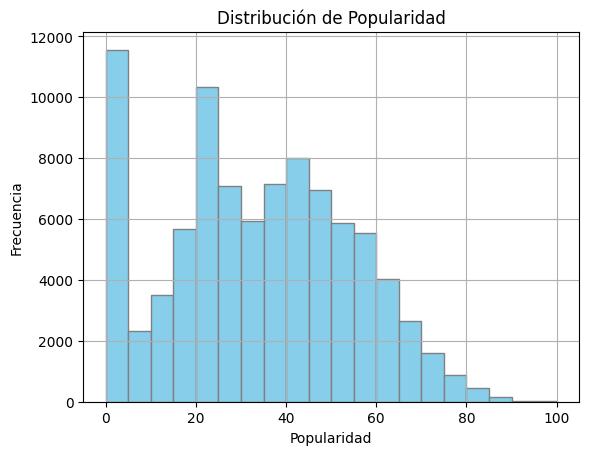

In [15]:
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='gray')
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


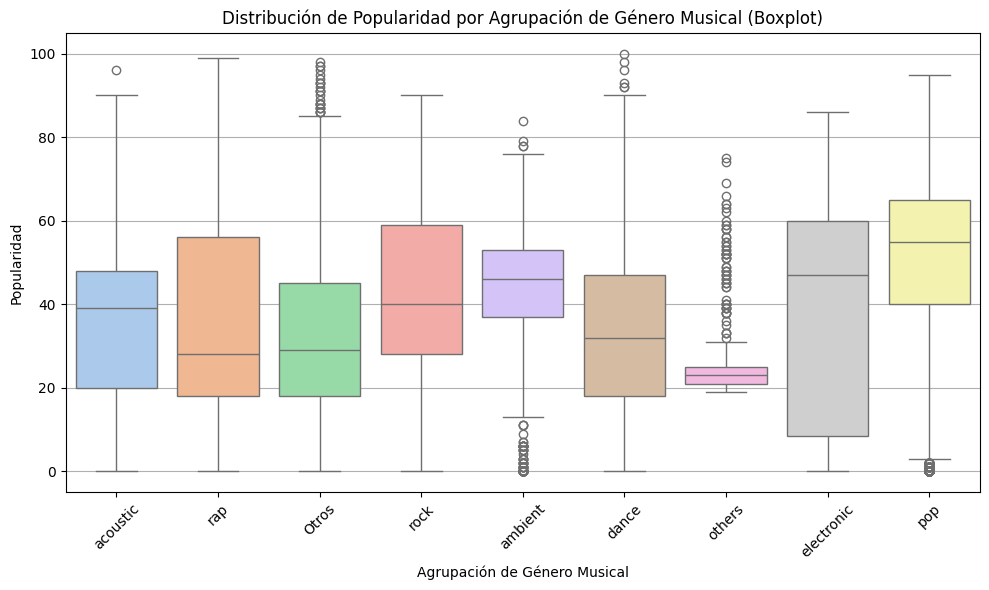

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grouping_name', y='popularity', data=df, hue='grouping_name', palette='pastel')
plt.title('Distribución de Popularidad por Agrupación de Género Musical (Boxplot)')
plt.xlabel('Agrupación de Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

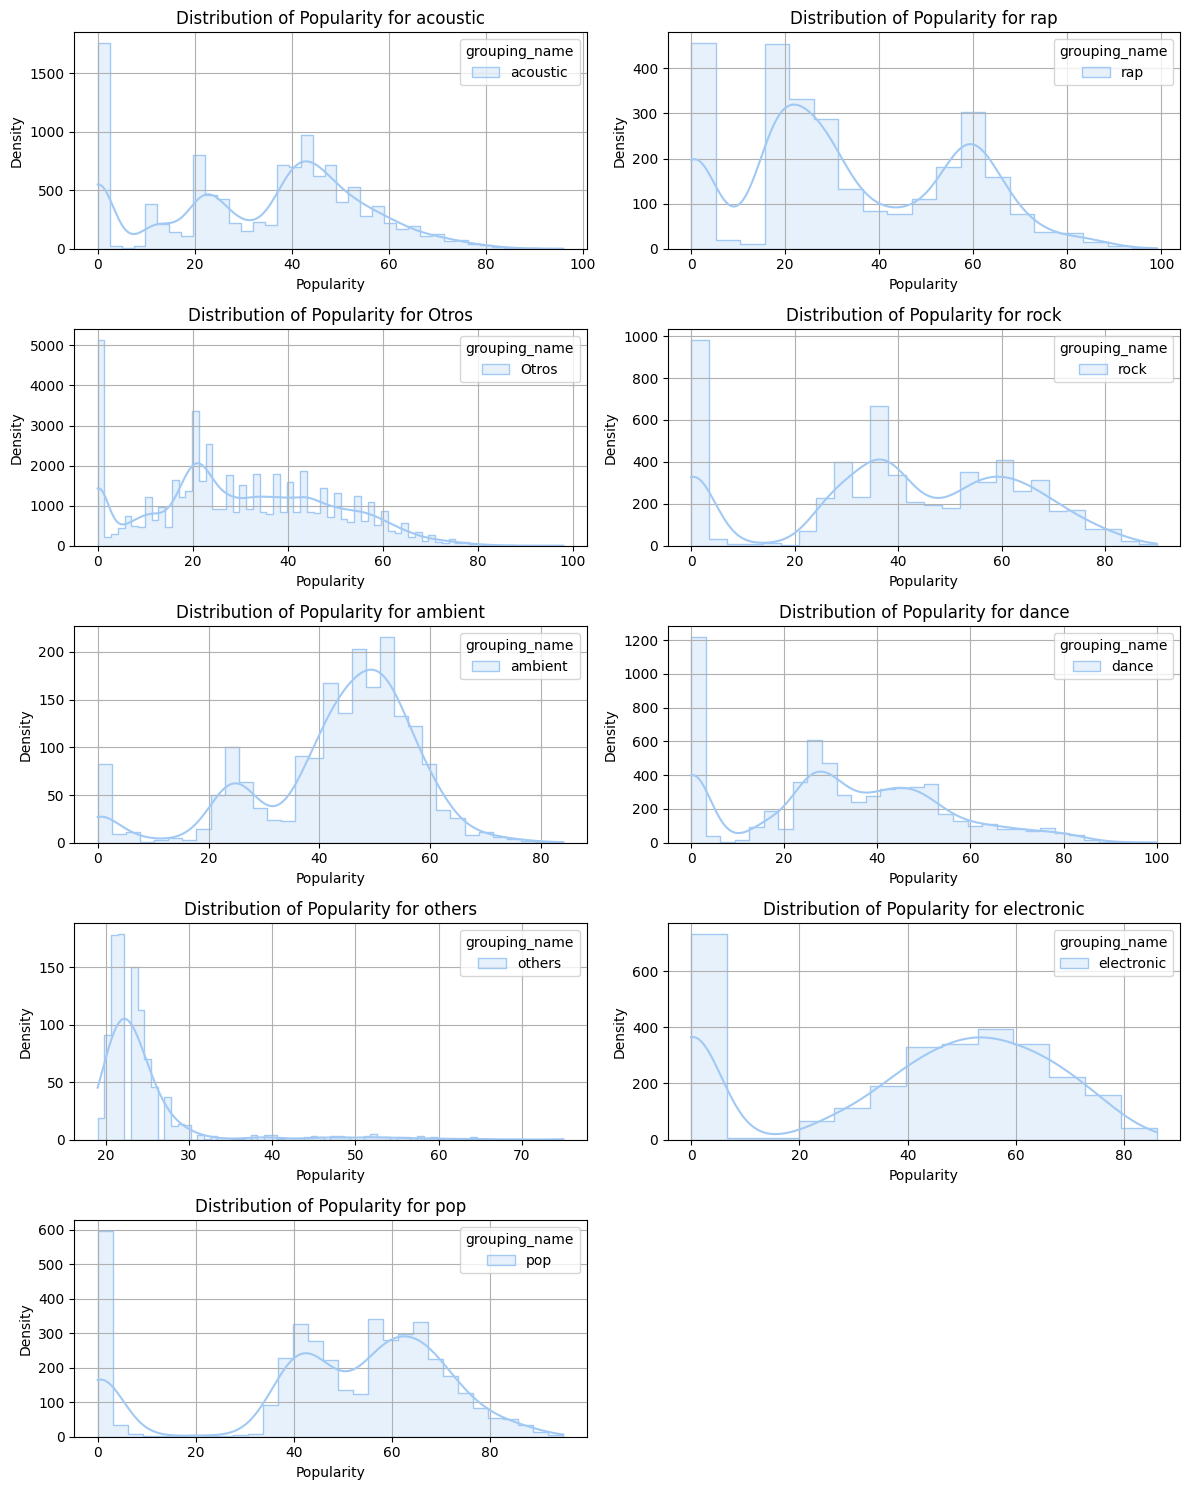

In [17]:
unique_genres = df['grouping_name'].unique()

plt.figure(figsize=(12, 15))

for i, genre in enumerate(unique_genres):
    plt.subplot(5, 2, i+1)  # 5 filas, 2 columnas, índice del subplot
    sns.histplot(data=df[df['grouping_name'] == genre], x='popularity', hue='grouping_name', kde=True, palette='pastel', fill=True,element='step')

    plt.title(f'Distribution of Popularity for {genre}')
    plt.xlabel('Popularity')
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Promedio de popularidad

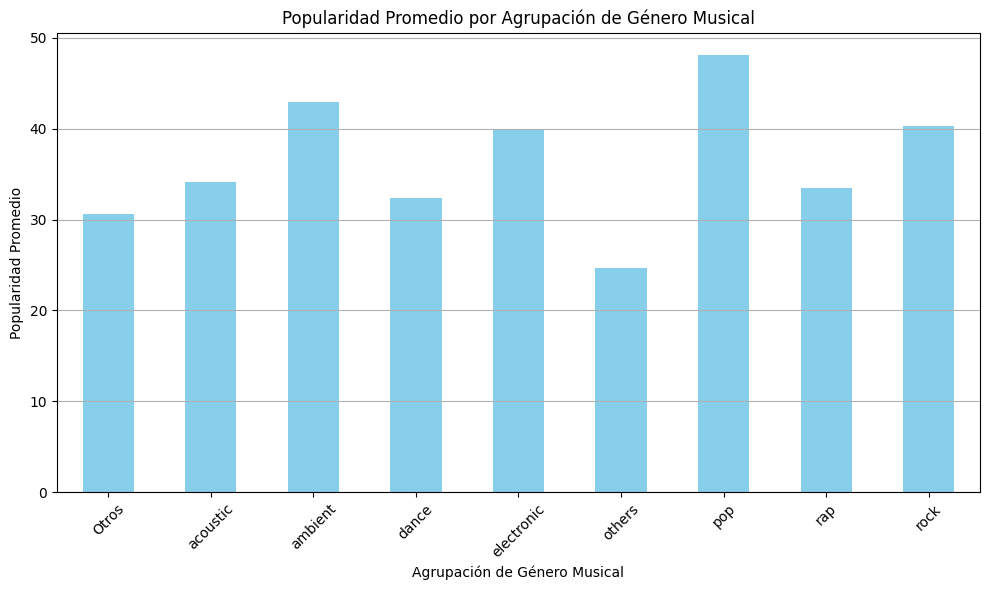

In [18]:
popularity_by_group = df.groupby('grouping_name')['popularity'].mean()

plt.figure(figsize=(10, 6))
popularity_by_group.plot(kind='bar', color='skyblue')
plt.title('Popularidad Promedio por Agrupación de Género Musical')
plt.xlabel('Agrupación de Género Musical')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Diagrama de Caja para Duración de la Pista

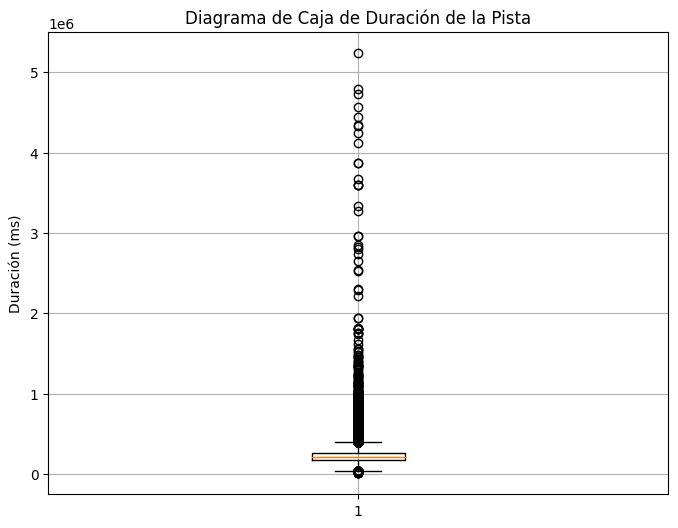

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['duration_ms'])
plt.title('Diagrama de Caja de Duración de la Pista')
plt.ylabel('Duración (ms)')
plt.grid(True)
plt.show()


### Gráfico comparativo de características por agrupación de género musical

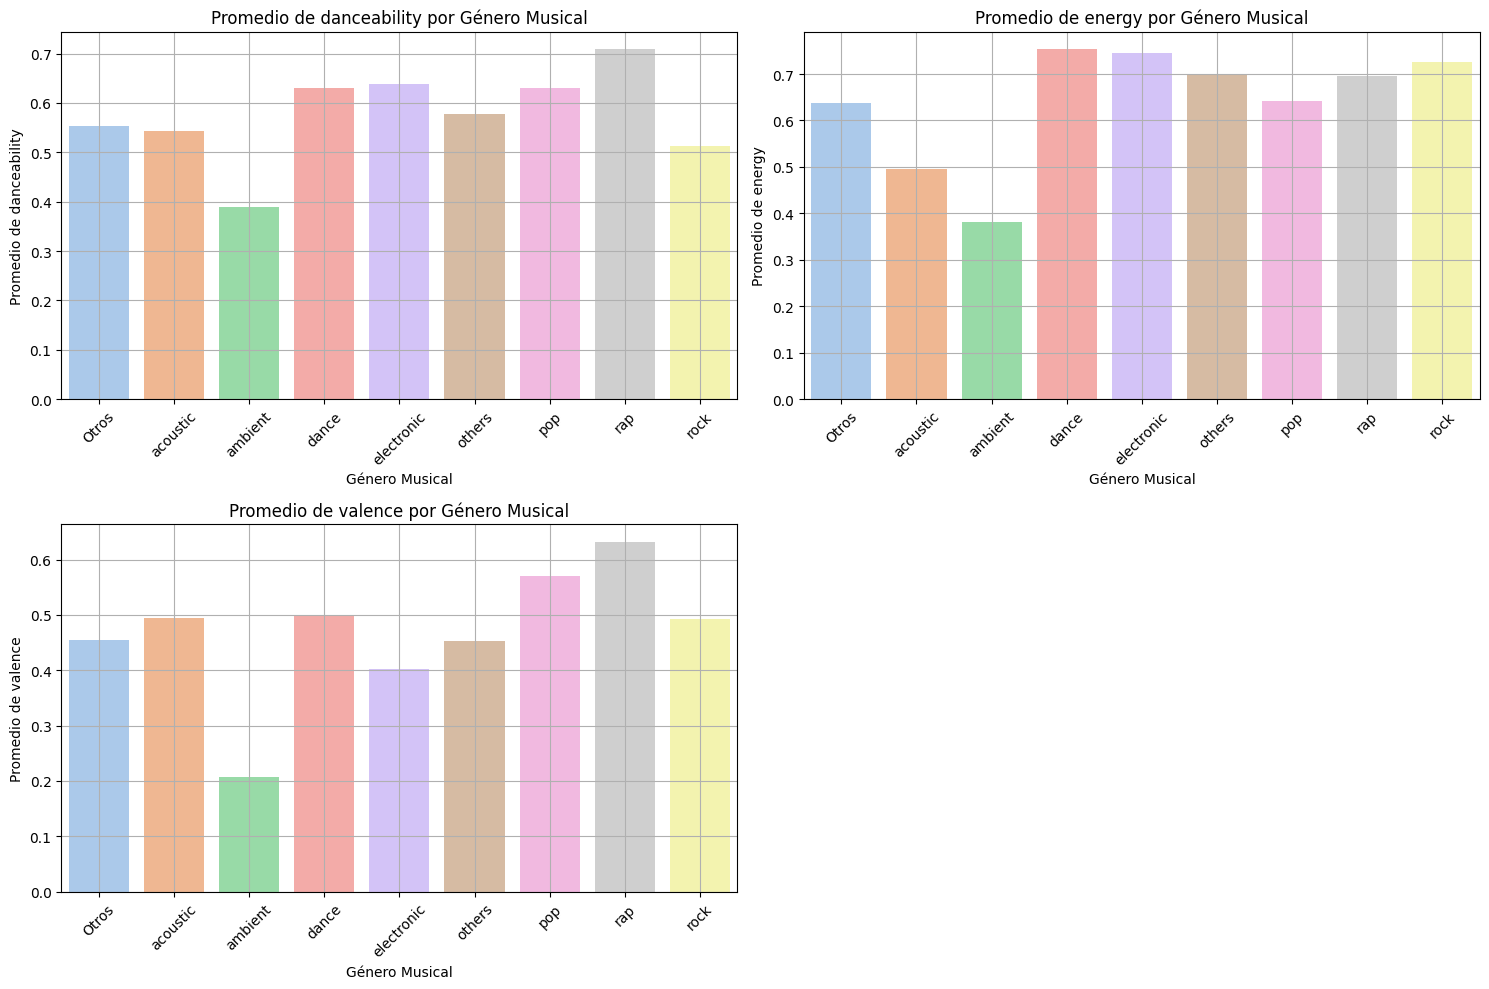

In [20]:
characteristics = ['danceability', 'energy', 'valence']

plt.figure(figsize=(15, 10))

for i, characteristic in enumerate(characteristics, 1):
    df_group_avg = df.pivot_table(index='grouping_name', values=characteristics, aggfunc='mean').reset_index()

    plt.subplot(2, 2, i)
    sns.barplot(data=df_group_avg, x='grouping_name', y=characteristic, hue='grouping_name', palette='pastel')
    plt.title(f'Promedio de {characteristic} por Género Musical')
    plt.xlabel('Género Musical')
    plt.ylabel(f'Promedio de {characteristic}')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


## Visualizaciones (sin outliers)

### Distribución de popularidad

In [21]:
outliers_popularity = outliers['popularity']
df_cleaned = df[outliers_popularity==False]

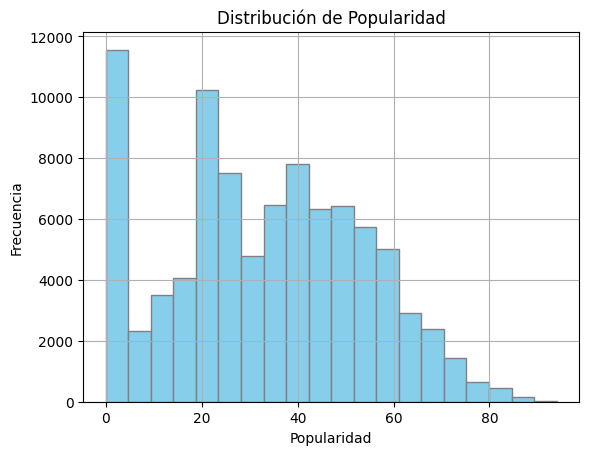

In [22]:
plt.hist(df_cleaned['popularity'], bins=20, color='skyblue', edgecolor='gray')
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


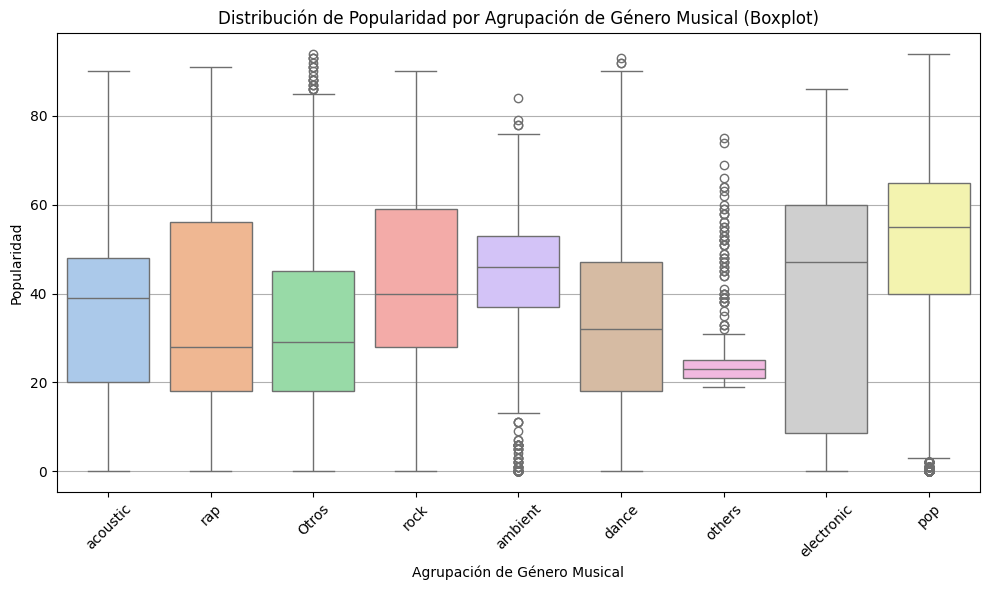

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grouping_name', y='popularity', data=df_cleaned, hue='grouping_name', palette='pastel')
plt.title('Distribución de Popularidad por Agrupación de Género Musical (Boxplot)')
plt.xlabel('Agrupación de Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

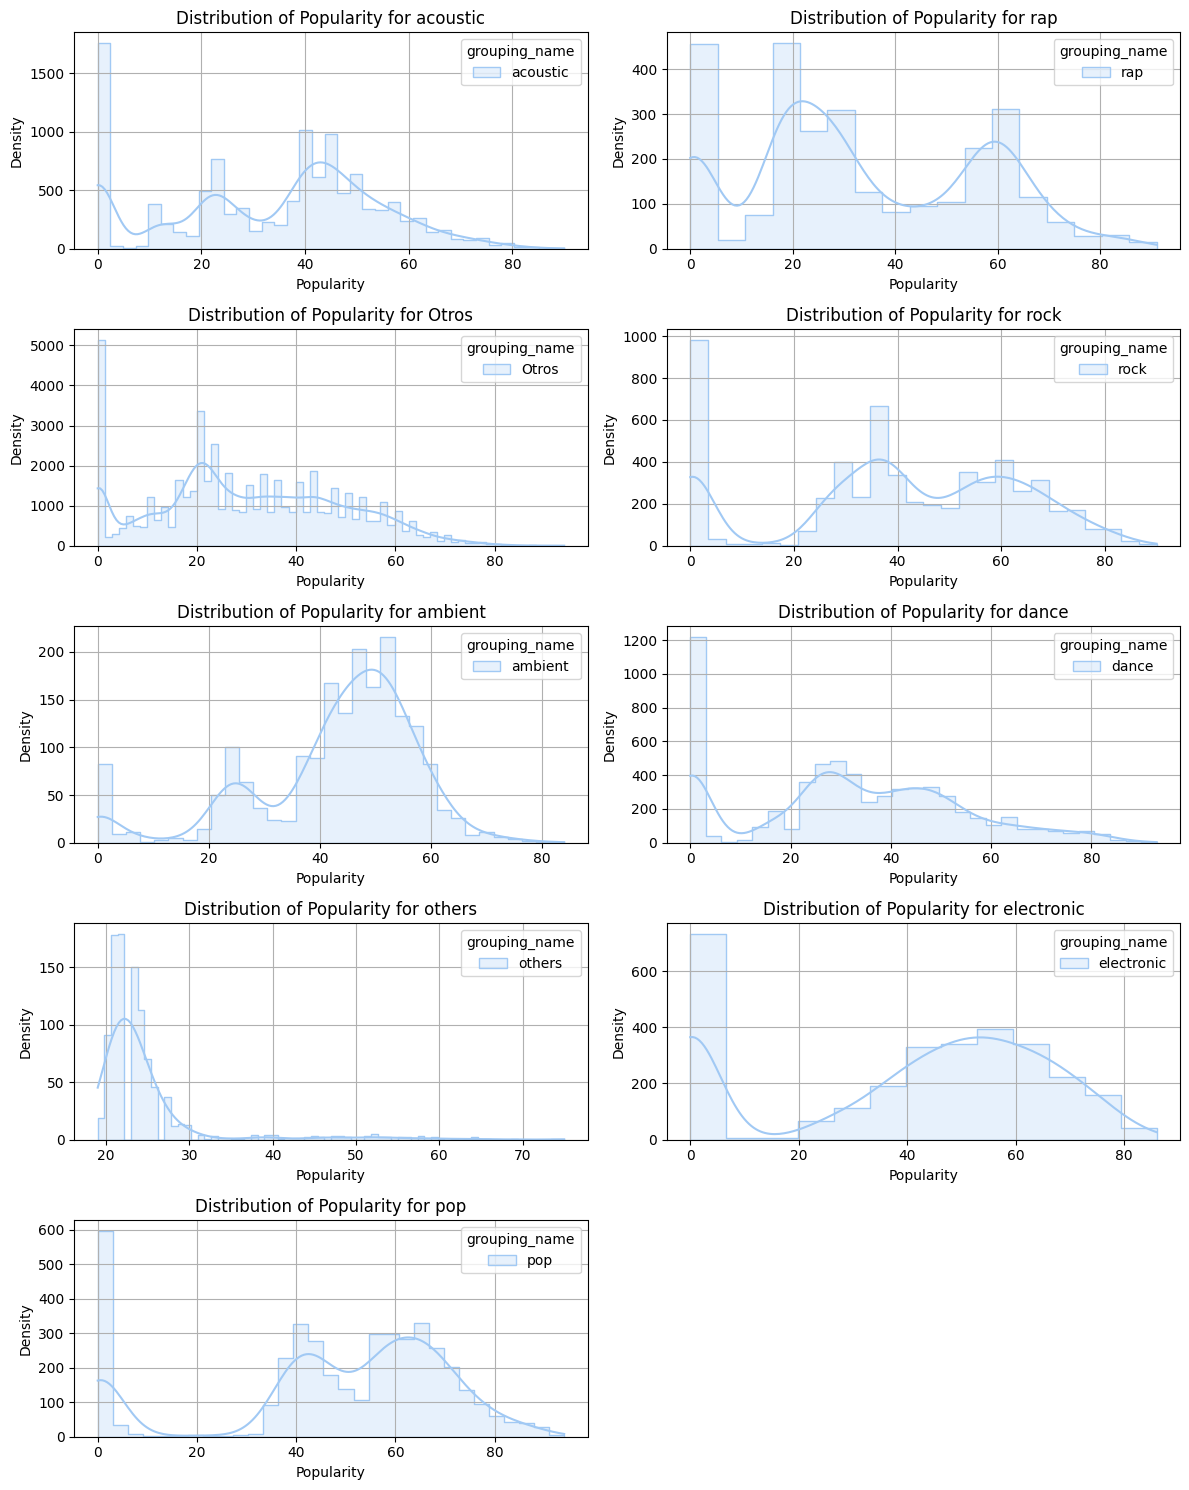

In [24]:
unique_genres = df['grouping_name'].unique()

plt.figure(figsize=(12, 15))

for i, genre in enumerate(unique_genres):
    plt.subplot(5, 2, i+1)  # 5 filas, 2 columnas, índice del subplot
    sns.histplot(data=df_cleaned[df_cleaned['grouping_name'] == genre], x='popularity', hue='grouping_name', kde=True, palette='pastel', fill=True,element='step')

    plt.title(f'Distribution of Popularity for {genre}')
    plt.xlabel('Popularity')
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Diagrama de Caja para Duración de la Pista

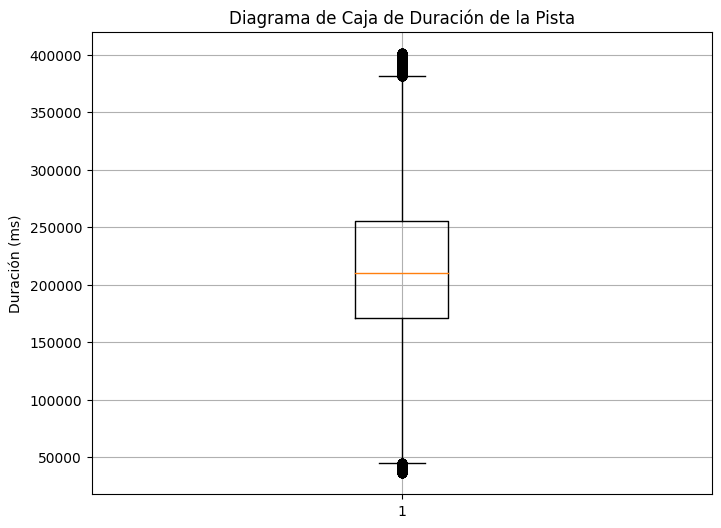

In [25]:
outliers_duration_ms = outliers['duration_ms']
df_cleaned = df[outliers_duration_ms==False]

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['duration_ms'])
plt.title('Diagrama de Caja de Duración de la Pista')
plt.ylabel('Duración (ms)')
plt.grid(True)
plt.show()


### Gráfico comparativo de características por agrupación de género musical

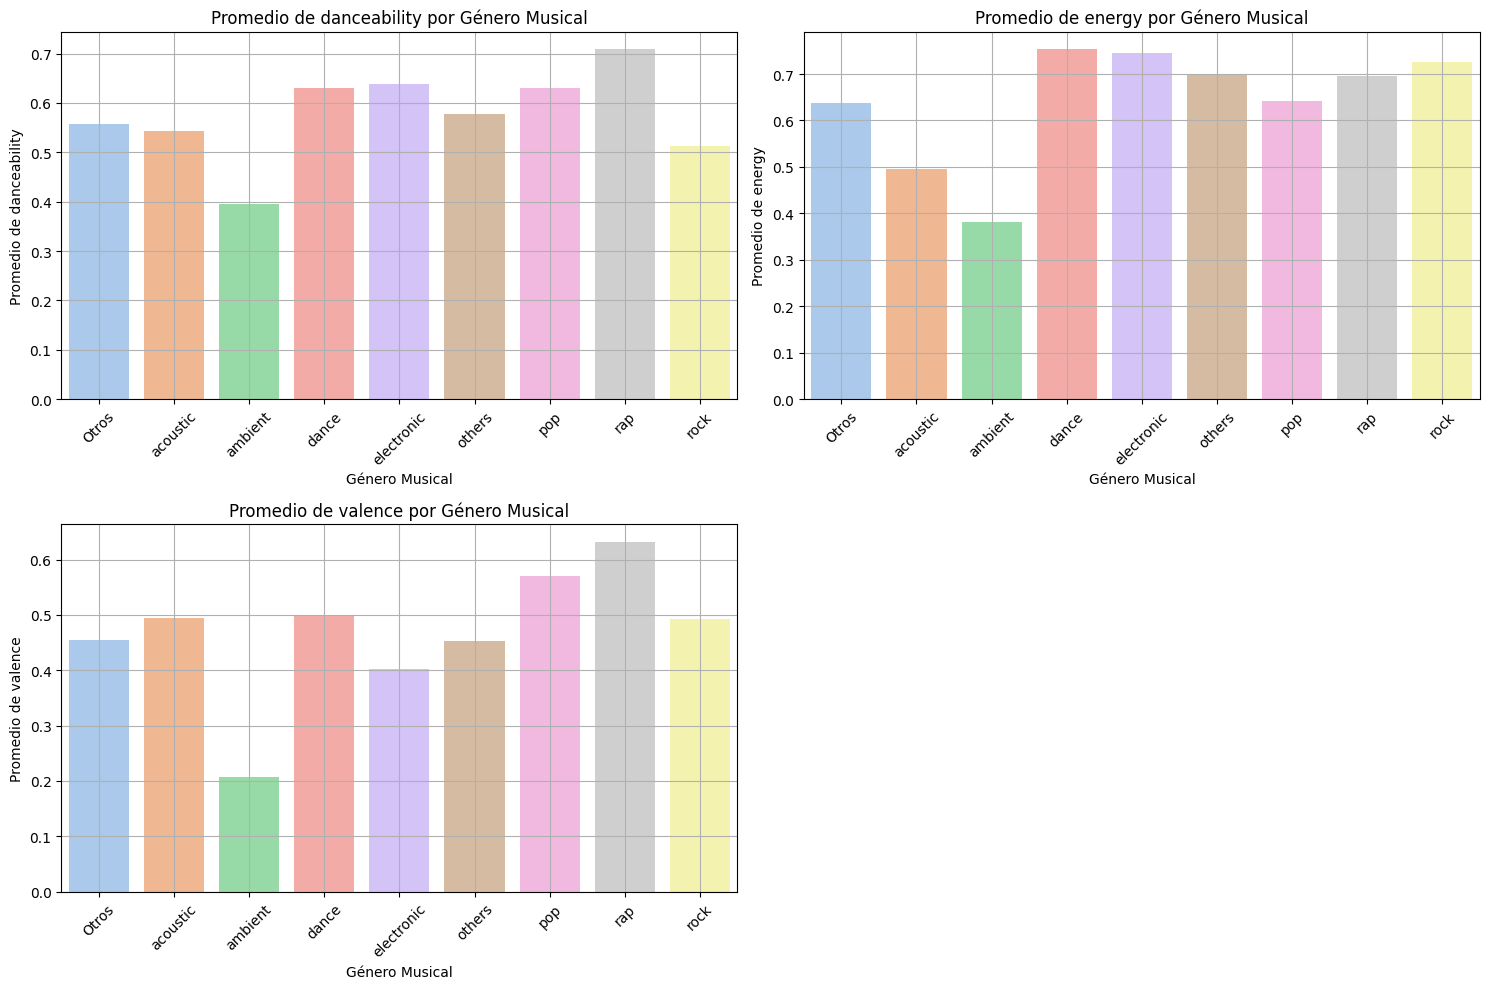

In [26]:
characteristics = ['danceability', 'energy', 'valence']

plt.figure(figsize=(15, 10))

for i, characteristic in enumerate(characteristics, 1):
    outliers_characteristic = outliers[characteristic]
    df_cleaned = df[outliers_characteristic==False]
    df_group_avg_cleaned = df_cleaned.pivot_table(index='grouping_name', values=characteristics, aggfunc='mean').reset_index()

    plt.subplot(2, 2, i)
    sns.barplot(data=df_group_avg_cleaned, x='grouping_name', y=characteristic, hue='grouping_name', palette='pastel')
    plt.title(f'Promedio de {characteristic} por Género Musical')
    plt.xlabel('Género Musical')
    plt.ylabel(f'Promedio de {characteristic}')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()
